In [8]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
# Load the Lightly selection in a list

In [9]:
lightly_file_name = '../assets/filenames-rumex_4by_4_50k-coreset-samples_20000-1688802987585.txt'

with open(lightly_file_name, 'r') as file:
    lines = file.readlines()

# Remove newline characters
lines = [line.strip() for line in lines]
im_list_lightly = [line.split('/')[0] for line in lines]


In [10]:
im_list_lightly.count('20220830_HaldenSued_S_10_F_20_O_stra_ID1')

15

In [5]:
# Count the number of images in each dataset before and after lightly selection

In [11]:
root = '/mnt/Foto-Work-RE/26_Agricultural_Engineering-RE/263_DP/Fenaco_Blackenprojekt_2021-2023/_CURATED_DATA_SETS/'
d_path_lightly_all = os.path.join(root, 'DataSelection/AllImages')
datasets = os.listdir(d_path_lightly_all)
datasets[0]

'20220830_HaldenSued_S_10_F_20_O_stra_ID1'

In [13]:
# Counting the number of images of each fiel in the lightly dataset
df = pd.DataFrame(columns=['dataset', 'total_nb_images', 'total_selected_lightly', 'size_gb'])
index = 0
for d in tqdm(datasets):
    d_path_original = os.path.join(root, 'DataSelection/AllImages', d)
    # Total number of images  in the original dataset before lightly filtering
    total_nb_images = sum( 1 for filename in os.listdir(d_path_original) if filename.endswith('.png'))
    
    # Check total number of annotated images from the lightly dataset
    total_selected_lightly = im_list_lightly.count(d)
    total_size = 0
    for image in os.listdir(d_path_original):
        if image.lower().endswith(('.png', '.jpeg')):
            file_path = os.path.join(d_path_original, image)
            total_size += os.path.getsize(file_path)

    total_gb = total_size / (1024**3)


    row = [d, total_nb_images, total_selected_lightly, total_gb]  # You can customize these values
    df.loc[index] = row
    if (total_nb_images < total_selected_lightly):
        print(d)
    index = index + 1

100%|██████████| 67/67 [57:56<00:00, 51.88s/it]   


In [14]:
df

,dataset,total_nb_images,total_selected_lightly,size_gb
0,20220830_HaldenSued_S_10_F_20_O_stra_ID1,4160,15,26.230771
1,20220816_TaenikonWiese_S_xx_F_xx_O_sama_ID4,2496,111,17.642551
2,20230616_TestHerrenpuentSuedwestStreifen3_S_00...,384,83,2.397175
3,20220823_HaldenSued_S_10_F_50_O_stra_ID1,13983,467,90.774811
4,20220816_TaenikonWiese_S_xx_F_xx_O_sama_ID3,1232,25,8.492684
...,...,...,...,...
62,20230403_HerrenpuentSuedOst_S_70_F_80_O_sama_ID1,13680,71,91.713037
63,20230621_HerrenpuentSuedwestStreifen_S_00_F_00...,816,179,5.044001
64,20230421_SchildHohenegg_S_20_F_50_O_sama_ID1,24896,526,157.814450
65,20230414_Waldegg_S_70_F_80_O_stra_ID1,22064,895,152.227965


In [36]:
df[df['total_nb_images'] < df['total_selected_lightly']]

,dataset,total_nb_images,total_selected_lightly,size_gb,total_annotated


In [37]:
df.to_csv('../assets/lightly_totalimages_selectedimages.csv', index=False)

In [ ]:
# 20220823_HaldenSued_S_10_F_50_O_stra_ID1	haldensued08
# 20220901_HaldenNord_S_10_F_50_O_sama_ID1	haldennord09
# 20221010_HaldenNord_S_25_F_60_O_sama_ID1	haldennord10
# 20221010_HaldenSued_S_25_F_60_sama_ID1	haldensued10


In [ ]:
# Total size of GBs for all dataset in lightly

In [38]:
np.sum(df['size_gb'])

3321.0813491325825

In [ ]:
# Size of the dataset 20221010_HaldenSued_S_25_F_60_sama_ID1 ==> Total number of images

In [39]:
np.sum(df['size_gb']) + 21

3342.0813491325825

In [41]:
df[df['dataset'] == '20220823_HaldenSued_S_10_F_50_O_stra_ID1']

,dataset,total_nb_images,total_selected_lightly,size_gb,total_annotated
3,20220823_HaldenSued_S_10_F_50_O_stra_ID1,13983,467,90.774811,8.0


In [42]:
df[df['dataset'] == '20220901_HaldenNord_S_10_F_50_O_sama_ID1']

,dataset,total_nb_images,total_selected_lightly,size_gb,total_annotated
43,20220901_HaldenNord_S_10_F_50_O_sama_ID1,9840,32,59.88314,12.0


In [43]:
df[df['dataset'] == '20221010_HaldenNord_S_25_F_60_O_sama_ID1']

,dataset,total_nb_images,total_selected_lightly,size_gb,total_annotated
66,20221010_HaldenNord_S_25_F_60_O_sama_ID1,22592,161,169.033334,36.0


In [44]:
df[df['dataset'] == '20221010_HaldenSued_S_25_F_60_sama_ID1']

,dataset,total_nb_images,total_selected_lightly,size_gb,total_annotated


In [ ]:
# Total number of images treated

In [45]:
nb_images_20221010_HaldenSued_S_25_F_60_sama_ID1 = 999
nb_images_all_others = np.sum(df['total_nb_images'])
nb_all_images = nb_images_all_others + nb_images_20221010_HaldenSued_S_25_F_60_sama_ID1
nb_all_images

508150

In [46]:
np.sum(df['total_selected_lightly'])

20000

In [ ]:
# Populating the CSV file with the total number of images with annotations

In [47]:
# Read the CSV file
df = pd.read_csv('../assets/lightly_totalimages_selectedimages.csv')

In [48]:
for dataset in ['haldennord09', 'haldensued08', 'haldensued10', 'haldennord10']:

   # Read the total number of annotated images
     #ann_path = f'/data/images/darwin/digital-production/{dataset}/releases/latest/annotations'
    ann_path = f'../assets/digital-production/{dataset}/releases/1/annotations'
    if os.path.exists(ann_path):
        ann_path = ann_path
    else:
        ann_path = f'../assets/digital-production/{dataset}/releases/2/annotations'


    total_annotated = len([name for name in os.listdir(ann_path) if name.endswith('.json')]) 
    # count the json files in the annotations directory
    
    # Update the DataFrame
    print(total_annotated)

3858
1661
1841
160


In [49]:
# Populating the dataframe with the number of annotated images from each dataset inside the lightly dataset
ann_path = f'/data/images/darwin/digital-production/lightly/releases/2/annotations'
ann_path = f'../assets/digital-production/lightly/releases/1/annotations'

annotations = [name for name in os.listdir(ann_path) if name.endswith('.json')]
annotations =[ '_'.join(i.split('.')[0].split ('_')[:-3] )  for i in annotations] 
# loop over the df rows 
for index, row in df.iterrows():
    dataset = row['dataset']
    # Count the number of annotations for the current dataset
    total_annotated = sum(1 for ann in annotations if dataset in ann)
    
    # Update the DataFrame
    df.at[index, 'total_annotated'] = total_annotated

In [50]:
np.sum(df['total_annotated'])

785.0

In [51]:
# put df in a news scv file
df.to_csv('../assets/lightly_totalimages_selectedimages_annotated.csv', index=False)

In [86]:
df = pd.read_csv('../assets/lightly_totalimages_selectedimages_annotated.csv')

In [80]:
df

,dataset,total_nb_images,total_selected_lightly,size_gb,total_annotated
0,20220830_HaldenSued_S_10_F_20_O_stra_ID1,4160,15,26.230771,4.0
1,20220816_TaenikonWiese_S_xx_F_xx_O_sama_ID4,2496,111,17.642551,2.0
2,20230616_TestHerrenpuentSuedwestStreifen3_S_00...,384,83,2.397175,0.0
3,20220823_HaldenSued_S_10_F_50_O_stra_ID1,13983,467,90.774811,8.0
4,20220816_TaenikonWiese_S_xx_F_xx_O_sama_ID3,1232,25,8.492684,0.0
...,...,...,...,...,...
62,20230403_HerrenpuentSuedOst_S_70_F_80_O_sama_ID1,13680,71,91.713037,1.0
63,20230621_HerrenpuentSuedwestStreifen_S_00_F_00...,816,179,5.044001,13.0
64,20230421_SchildHohenegg_S_20_F_50_O_sama_ID1,24896,526,157.814450,0.0
65,20230414_Waldegg_S_70_F_80_O_stra_ID1,22064,895,152.227965,0.0


In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame here
# Example:
# df = pd.read_csv('your_dataset.csv')

# For demonstration, this assumes `df` is already available
# Ensure all numeric columns are numeric
df['total_nb_images'] = pd.to_numeric(df['total_nb_images'], errors='coerce')
df['total_selected_lightly'] = pd.to_numeric(df['total_selected_lightly'], errors='coerce')
df['total_annotated'] = pd.to_numeric(df['total_annotated'], errors='coerce')

# Sort by total_nb_images descending
df_sorted = df.sort_values(by='total_nb_images', ascending=False)

# Compute the residual parts of the bars
df_sorted['selected_lightly_but_not_annotated'] = df_sorted['total_selected_lightly'] - df_sorted['total_annotated']
df_sorted['unselected_for_annotation'] = df_sorted['total_nb_images'] - df_sorted['total_selected_lightly']
df_sorted

,dataset,total_nb_images,total_selected_lightly,size_gb,total_annotated,selected_lightly_but_not_annotated,unselected_for_annotation
57,20221010_HaldenSued_S_25_F_60_O_sama_ID1,25552,792,156.106145,30.0,762.0,24760
64,20230421_SchildHohenegg_S_20_F_50_O_sama_ID1,24896,526,157.814450,0.0,526.0,24370
66,20221010_HaldenNord_S_25_F_60_O_sama_ID1,22592,161,169.033334,36.0,125.0,22431
65,20230414_Waldegg_S_70_F_80_O_stra_ID1,22064,895,152.227965,0.0,895.0,21169
22,20230609_RuedimoosTaenikon_S_20_F_60_H_12_O_kr...,21120,415,142.431906,12.0,403.0,20705
...,...,...,...,...,...,...,...
60,20230620_HerrenpuentSuedwestTestfield_S_00_F_0...,624,45,4.030644,6.0,39.0,579
32,20230616_HerrenpuentSuedwestTestfield_S_00_F_0...,592,43,3.785001,5.0,38.0,549
44,20230616_TestHerrenpuentSuedwestStreifen2_S_00...,384,89,2.242138,8.0,81.0,295
2,20230616_TestHerrenpuentSuedwestStreifen3_S_00...,384,83,2.397175,0.0,83.0,301


In [88]:
df_sorted = df_sorted[[col for col in df_sorted.columns if col != 'size_gb'] + ['size_gb']]
df_sorted

,dataset,total_nb_images,total_selected_lightly,total_annotated,selected_lightly_but_not_annotated,unselected_for_annotation,size_gb
57,20221010_HaldenSued_S_25_F_60_O_sama_ID1,25552,792,30.0,762.0,24760,156.106145
64,20230421_SchildHohenegg_S_20_F_50_O_sama_ID1,24896,526,0.0,526.0,24370,157.814450
66,20221010_HaldenNord_S_25_F_60_O_sama_ID1,22592,161,36.0,125.0,22431,169.033334
65,20230414_Waldegg_S_70_F_80_O_stra_ID1,22064,895,0.0,895.0,21169,152.227965
22,20230609_RuedimoosTaenikon_S_20_F_60_H_12_O_kr...,21120,415,12.0,403.0,20705,142.431906
...,...,...,...,...,...,...,...
60,20230620_HerrenpuentSuedwestTestfield_S_00_F_0...,624,45,6.0,39.0,579,4.030644
32,20230616_HerrenpuentSuedwestTestfield_S_00_F_0...,592,43,5.0,38.0,549,3.785001
44,20230616_TestHerrenpuentSuedwestStreifen2_S_00...,384,89,8.0,81.0,295,2.242138
2,20230616_TestHerrenpuentSuedwestStreifen3_S_00...,384,83,0.0,83.0,301,2.397175


In [89]:
df_sorted = df_sorted.copy()

# Add the new field_label column
df_sorted['field_label'] = [f'Field {i+1}' for i in range(len(df_sorted))]

# Reorder columns to put 'field_label' as the second column
cols = df_sorted.columns.tolist()
# Move 'field_label' to index 1
cols.insert(1, cols.pop(cols.index('field_label')))
df_sorted = df_sorted[cols]


In [90]:
df_sorted

,dataset,field_label,total_nb_images,total_selected_lightly,total_annotated,selected_lightly_but_not_annotated,unselected_for_annotation,size_gb
57,20221010_HaldenSued_S_25_F_60_O_sama_ID1,Field 1,25552,792,30.0,762.0,24760,156.106145
64,20230421_SchildHohenegg_S_20_F_50_O_sama_ID1,Field 2,24896,526,0.0,526.0,24370,157.814450
66,20221010_HaldenNord_S_25_F_60_O_sama_ID1,Field 3,22592,161,36.0,125.0,22431,169.033334
65,20230414_Waldegg_S_70_F_80_O_stra_ID1,Field 4,22064,895,0.0,895.0,21169,152.227965
22,20230609_RuedimoosTaenikon_S_20_F_60_H_12_O_kr...,Field 5,21120,415,12.0,403.0,20705,142.431906
...,...,...,...,...,...,...,...,...
60,20230620_HerrenpuentSuedwestTestfield_S_00_F_0...,Field 63,624,45,6.0,39.0,579,4.030644
32,20230616_HerrenpuentSuedwestTestfield_S_00_F_0...,Field 64,592,43,5.0,38.0,549,3.785001
44,20230616_TestHerrenpuentSuedwestStreifen2_S_00...,Field 65,384,89,8.0,81.0,295,2.242138
2,20230616_TestHerrenpuentSuedwestStreifen3_S_00...,Field 66,384,83,0.0,83.0,301,2.397175


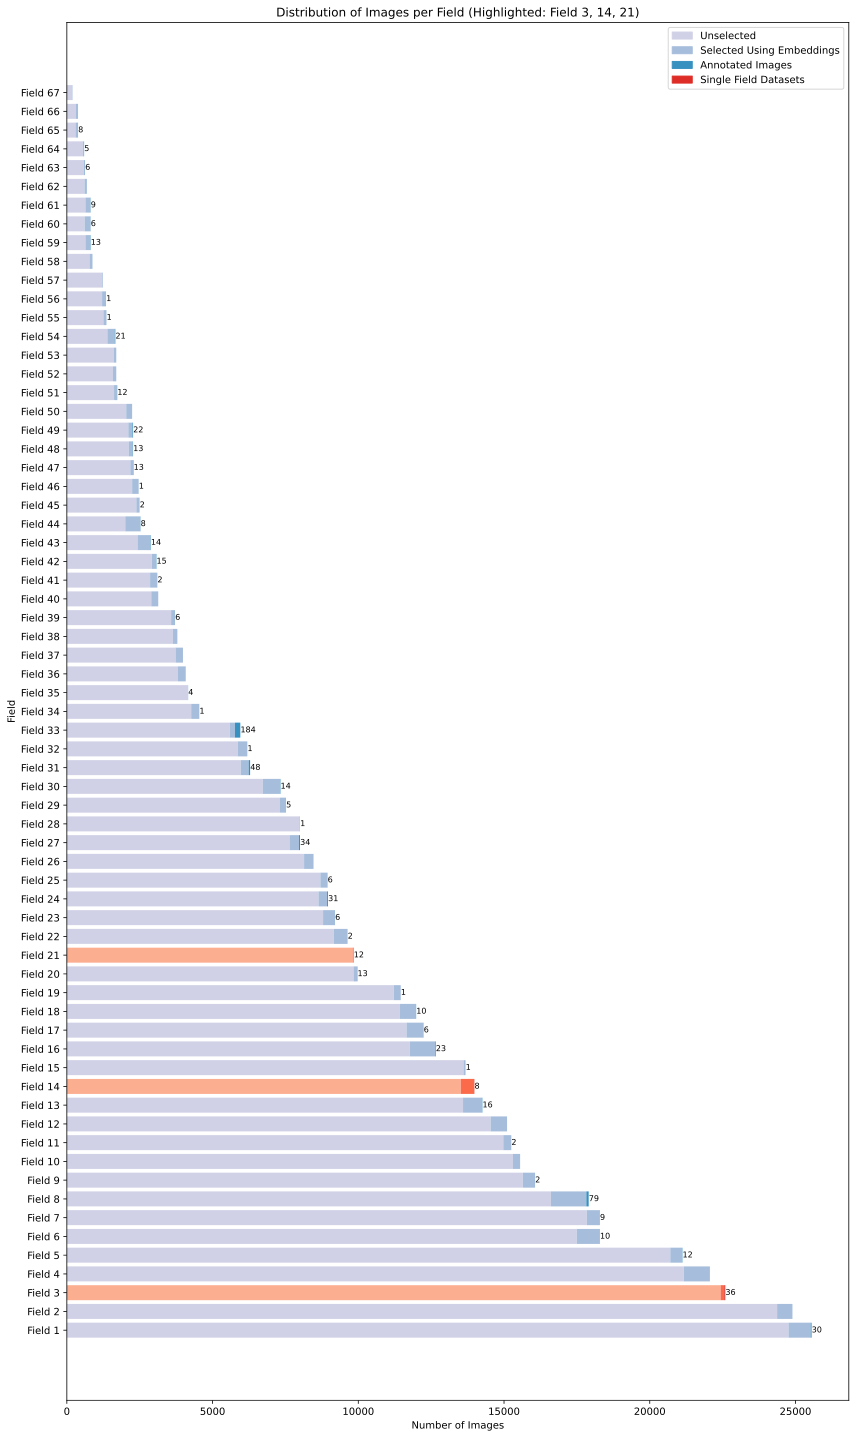

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# Set figure size
num_fields = len(df_sorted)
fig, ax = plt.subplots(figsize=(12, num_fields * 0.3))

# Define fields to highlight
highlight_fields = ['Field 3', 'Field 14', 'Field 21']

# Colors
colors_normal = {
    'unselected': '#d0d1e6',
    'selected': '#a6bddb',
    'annotated': '#3690c0'
}
colors_highlight = {
    'unselected': '#fcae91',   # salmon
    'selected': '#fb6a4a',     # red-orange
    'annotated': '#de2d26'     # bold red
}

# Determine bar colors per row
bar_colors_unselected = []
bar_colors_selected = []
bar_colors_annotated = []

for label in df_sorted['field_label']:
    if label in highlight_fields:
        bar_colors_unselected.append(colors_highlight['unselected'])
        bar_colors_selected.append(colors_highlight['selected'])
        bar_colors_annotated.append(colors_highlight['annotated'])
    else:
        bar_colors_unselected.append(colors_normal['unselected'])
        bar_colors_selected.append(colors_normal['selected'])
        bar_colors_annotated.append(colors_normal['annotated'])

# Plot bars
bar1 = ax.barh(df_sorted['field_label'], df_sorted['unselected_for_annotation'],
               color=bar_colors_unselected, label='Unselected for Annotation')

bar2 = ax.barh(df_sorted['field_label'], df_sorted['selected_lightly_but_not_annotated'],
               left=df_sorted['unselected_for_annotation'], color=bar_colors_selected,
               label='Selected but Not Annotated')

bar3 = ax.barh(df_sorted['field_label'], df_sorted['total_annotated'],
               left=df_sorted['unselected_for_annotation'] + df_sorted['selected_lightly_but_not_annotated'],
               color=bar_colors_annotated, label='Annotated Images')

# Annotate bar3 (annotated images)
for i, (bar, value) in enumerate(zip(bar3, df_sorted['total_annotated'])):
    if value > 0:
        ax.text(bar.get_x() + bar.get_width() + 5,
                bar.get_y() + bar.get_height() / 2,
                f'{int(value)}', va='center', ha='left', fontsize=8)

# Labels and title
ax.set_xlabel('Number of Images')
ax.set_ylabel('Field')
ax.set_title('Distribution of Images per Field (Highlighted: Field 3, 14, 21)')

# Set Y-ticks directly from field_label
ax.set_yticks(range(num_fields))
ax.set_yticklabels(df_sorted['field_label'])

# Custom legend to match the main categories (not individual highlights)
from matplotlib.patches import Patch
custom_legend = [
    Patch(color=colors_normal['unselected'], label='Unselected'),
    Patch(color=colors_normal['selected'], label='Selected Using Embeddings'),
    Patch(color=colors_normal['annotated'], label='Annotated Images'),
    Patch(color=colors_highlight['annotated'], label='Single Field Datasets')
]
ax.legend(handles=custom_legend, loc='upper right')

# Final layout + save
plt.tight_layout()
fig.savefig('../assets/figures/dataset_distribution_highlighted.png', dpi=300, bbox_inches='tight')
plt.show()


In [92]:
df_sorted

,dataset,field_label,total_nb_images,total_selected_lightly,total_annotated,selected_lightly_but_not_annotated,unselected_for_annotation,size_gb
57,20221010_HaldenSued_S_25_F_60_O_sama_ID1,Field 1,25552,792,30.0,762.0,24760,156.106145
64,20230421_SchildHohenegg_S_20_F_50_O_sama_ID1,Field 2,24896,526,0.0,526.0,24370,157.814450
66,20221010_HaldenNord_S_25_F_60_O_sama_ID1,Field 3,22592,161,36.0,125.0,22431,169.033334
65,20230414_Waldegg_S_70_F_80_O_stra_ID1,Field 4,22064,895,0.0,895.0,21169,152.227965
22,20230609_RuedimoosTaenikon_S_20_F_60_H_12_O_kr...,Field 5,21120,415,12.0,403.0,20705,142.431906
...,...,...,...,...,...,...,...,...
60,20230620_HerrenpuentSuedwestTestfield_S_00_F_0...,Field 63,624,45,6.0,39.0,579,4.030644
32,20230616_HerrenpuentSuedwestTestfield_S_00_F_0...,Field 64,592,43,5.0,38.0,549,3.785001
44,20230616_TestHerrenpuentSuedwestStreifen2_S_00...,Field 65,384,89,8.0,81.0,295,2.242138
2,20230616_TestHerrenpuentSuedwestStreifen3_S_00...,Field 66,384,83,0.0,83.0,301,2.397175


In [93]:
df_sorted[df_sorted['dataset'] == '20220823_HaldenSued_S_10_F_50_O_stra_ID1']

,dataset,field_label,total_nb_images,total_selected_lightly,total_annotated,selected_lightly_but_not_annotated,unselected_for_annotation,size_gb
3,20220823_HaldenSued_S_10_F_50_O_stra_ID1,Field 14,13983,467,8.0,459.0,13516,90.774811


In [94]:
df_sorted[df_sorted['dataset'] == '20220901_HaldenNord_S_10_F_50_O_sama_ID1']

,dataset,field_label,total_nb_images,total_selected_lightly,total_annotated,selected_lightly_but_not_annotated,unselected_for_annotation,size_gb
43,20220901_HaldenNord_S_10_F_50_O_sama_ID1,Field 21,9840,32,12.0,20.0,9808,59.88314


In [95]:
df_sorted[df_sorted['dataset'] == '20221010_HaldenNord_S_25_F_60_O_sama_ID1']

,dataset,field_label,total_nb_images,total_selected_lightly,total_annotated,selected_lightly_but_not_annotated,unselected_for_annotation,size_gb
66,20221010_HaldenNord_S_25_F_60_O_sama_ID1,Field 3,22592,161,36.0,125.0,22431,169.033334


In [96]:
df_sorted[df_sorted['dataset'] == '20221010_HaldenSued_S_25_F_60_sama_ID1']

,dataset,field_label,total_nb_images,total_selected_lightly,total_annotated,selected_lightly_but_not_annotated,unselected_for_annotation,size_gb
